## Домашнее задание

Основаная задача - **построить хорошую тематическую модель с интерпретируемыми топиками с помощью BigARTM**.

1) сделайте нормализацию (если pymorphy2 работает долго используйте mystem или попробуйте установить быструю версию - `pip install pymorphy2[fast]`, можно использовать какой-то другой токенизатор) 

2) добавьте нграммы (в тетрадке есть закомменченая ячейка с Phrases, можно также попробовать другие способы построить нграммы); 

3) сохраните тексты .vw формате;

4) сделайте хороший словарь (отфильтруйте слишком частотные и редкие слова, попробуйте удалить стоп-слова, сохраните словарь и посмотрите на него, вдруг что-то плохое сразу будет заметно - из словаря можно просто вручную или правилом удалять строки, при загрузке ничего не сломается); 

5) постройте несколько ARTM моделей (переберите количество тем, поменяйте значения tau у регуляризаторов), если получаются плохие темы, поработайте дополнительно над предобработкой и словарем; 

6) для самой хорошей модели в отдельной ячейке напечатайте 3 хороших (на ваш вкус) темы

7) в другой ячейке нарисуйте график обучения этой модели 

8) в третьей ячейки опишите какие параметры (количество тем, регуляризаторы, их tau) вы использовали и как обучали (например, после скольки проходов добавили регуляризатор разрежнивания тем (Phi), добавляли ли разреженность документам (Theta) и когда, как повышали значения, сколько итерации модель продожала улучшаться (снижалась перплексия, росли другие метрики);

Сохраните тетрадку с экспериментами и положите её на гитхаб, ссылку на неё укажите в форме.

**Оцениваться будут главным образом пункты 6, 7 и 8. (3, 1, 4 баллов соответственно). Чтобы заработать остальные 2 балла, нужно хотя бы немного изменить мой код на промежуточных этапах (добавить что-то, указать другие параметры и т.д). **

### Установка BigARTM
Все точно как в инструкции на их сайте, только без установки питона и пипа.

In [9]:
!apt-get --yes install git make cmake build-essential libboost-all-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
build-essential is already the newest version (12.4ubuntu1).
make is already the newest version (4.1-9.1ubuntu1).
make set to manually installed.
git is already the newest version (1:2.17.1-1ubuntu0.3).
The following additional packages will be installed:
  autotools-dev cmake-data file ibverbs-providers libarchive13
  libboost-atomic-dev libboost-atomic1.65-dev libboost-atomic1.65.1
  libboost-chrono-dev libboost-chrono1.65-dev libboost-chrono1.65.1
  libboost-container-dev libboost-container1.65-dev libboost-container1.65.1
  libboost-context-dev libboost-context1.65-dev libboost-context1.65.1
  libboost-coroutine-dev libboost-coroutine1.65-dev libboost-coroutine1.65.1
  libboost-date-time-dev libboost-date-time1.65-dev libboost-date-time1.65.1
  libboost-dev libboost-exception-dev libboost-exception1.65-dev
  libboost-fiber-dev libboost-fiber1.65-dev libboost-fiber1.65.1
  libboost-filesy

In [6]:
!pip install protobuf tqdm wheel

In [1]:
!git clone --branch=stable https://github.com/bigartm/bigartm.git

Cloning into 'bigartm'...
remote: Enumerating objects: 45, done.
remote: Counting objects: 100% (45/45), done.
remote: Compressing objects: 100% (42/42), done.
remote: Total 15998 (delta 14), reused 9 (delta 3), pack-reused 15953
Receiving objects: 100% (15998/15998), 16.99 MiB | 21.20 MiB/s, done.
Resolving deltas: 100% (11148/11148), done.


In [10]:
cd bigartm

[Errno 2] No such file or directory: 'bigartm'
/content/bigartm/build


In [0]:
mkdir build

In [4]:
cd build

/content/bigartm/build


In [12]:
!cmake ..

-- The C compiler identification is GNU 7.3.0
-- The CXX compiler identification is GNU 7.3.0
-- Check for working C compiler: /usr/bin/cc
-- Check for working C compiler: /usr/bin/cc -- works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Detecting C compile features
-- Detecting C compile features - done
-- Check for working CXX compiler: /usr/bin/c++
-- Check for working CXX compiler: /usr/bin/c++ -- works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- Build type: Release
-- Looking for include file unistd.h
-- Looking for include file unistd.h - found
-- Boost version: 1.65.1
-- Looking for pthread.h
-- Looking for pthread.h - found
-- Looking for pthread_create
-- Looking for pthread_create - not found
-- Looking for pthread_create in pthreads
-- Looking for pthread_create in pthreads - not found
-- Looking for pthread_create in pthread
-- Lookin

In [14]:
!make

Scanning dependencies of target gflags-static
[  1%] Building CXX object 3rdparty/gflags/CMakeFiles/gflags-static.dir/src/gflags.cc.o
[  1%] Building CXX object 3rdparty/gflags/CMakeFiles/gflags-static.dir/src/gflags_reporting.cc.o
[  1%] Building CXX object 3rdparty/gflags/CMakeFiles/gflags-static.dir/src/gflags_completions.cc.o
[  2%] Linking CXX static library ../../lib/libgflags.a
[  2%] Built target gflags-static
Scanning dependencies of target google-glog
[  2%] Building CXX object 3rdparty/glog/CMakeFiles/google-glog.dir/src/logging.cc.o
[  2%] Building CXX object 3rdparty/glog/CMakeFiles/google-glog.dir/src/raw_logging.cc.o
[  3%] Building CXX object 3rdparty/glog/CMakeFiles/google-glog.dir/src/vlog_is_on.cc.o
[  3%] Building CXX object 3rdparty/glog/CMakeFiles/google-glog.dir/src/utilities.cc.o
[  3%] Building CXX object 3rdparty/glog/CMakeFiles/google-glog.dir/src/demangle.cc.o
[  4%] Building CXX object 3rdparty/glog/CMakeFiles/google-glog.dir/src/symbolize.cc.o
[  4%] Build

In [15]:
!pip install python/bigartm*.whl -U

Processing ./python/bigartm-0.9.0-cp36-cp36m-linux_x86_64.whl


Вернемся в изначальную папку.

In [16]:
cd ../.. 

/content


In [17]:
!pip install pymorphy2[fast] nltk gensim

    100% |████████████████████████████████| 51kB 1.7MB/s 
    100% |████████████████████████████████| 23.6MB 1.4MB/s 
    100% |████████████████████████████████| 7.1MB 1.1MB/s 
    100% |████████████████████████████████| 256kB 27.3MB/s 
    100% |████████████████████████████████| 1.4MB 13.7MB/s 
    100% |████████████████████████████████| 133kB 27.3MB/s 
    100% |████████████████████████████████| 61kB 21.6MB/s 
    100% |████████████████████████████████| 4.9MB 1.1MB/s 
    100% |████████████████████████████████| 552kB 22.1MB/s 
  Running setup.py bdist_wheel for docopt ... - done
  Stored in directory: /root/.cache/pip/wheels/9b/04/dd/7daf4150b6d9b12949298737de9431a324d4b797ffd63f526e
  Running setup.py bdist_wheel for DAWG ... - \ | / - \ | / - \ | / - \ | / - \ | / - done
  Stored in directory: /root/.cache/pip/wheels/d4/88/d0/4e4abc83eb8f59a71e8dbd8ba99fd5615a3af1fac1ef7f8825
  Running setup.py bdist_wheel for smart-open ... - done
  St

In [5]:
import artm
%matplotlib inline
import glob
import os, re
import matplotlib.pyplot as plt
from collections import defaultdict, Counter
from nltk.corpus import stopwords
import numpy as np
from pymorphy2 import MorphAnalyzer
import gensim, nltk
morph = MorphAnalyzer()
from nltk.tokenize import word_tokenize

/usr/local/lib/python3.6/dist-packages/scipy/sparse/sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


In [19]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

**1) сделайте нормализацию (если pymorphy2 работает долго используйте mystem или попробуйте установить быструю версию - pip install pymorphy2[fast], можно использовать какой-то другой токенизатор)**

In [0]:
def remove_tags(text):
    text = re.sub('&gt;', '', text)
    text = re.sub('&lt;', '', text)
    text = re.sub('\\t', '', text)
    return re.sub(r'<[^>]+>', '', text)

def clean(words):
 
    norm_uniq = []
    for word in words:
       if word.isalnum():
          mp = morph.parse(word)[0]
          if 'NUMB' not in mp.tag:
            norm_uniq.append(mp.normal_form)

    return norm_uniq

In [0]:
#nltk.download('stopwords')
stops = set(stopwords.words('russian'))
stops |= set(stopwords.words('english'))

## Возьмем теже данные

In [24]:
!wget https://github.com/mannefedov/compling_nlp_hse_course/raw/master/data/habr_texts.txt.zip

--2018-11-26 16:45:59--  https://github.com/mannefedov/compling_nlp_hse_course/raw/master/data/habr_texts.txt.zip
Resolving github.com (github.com)... 192.30.253.113, 192.30.253.112
Connecting to github.com (github.com)|192.30.253.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mannefedov/compling_nlp_hse_course/master/data/habr_texts.txt.zip [following]
--2018-11-26 16:45:59--  https://raw.githubusercontent.com/mannefedov/compling_nlp_hse_course/master/data/habr_texts.txt.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18645068 (18M) [application/zip]
Saving to: ‘habr_texts.txt.zip’

habr_texts.txt.zip  100%[===================>]  17.78M  28.1MB/s    in 0.6s    

2018-11-26 16:46:00 (28.1 M

In [25]:
!unzip habr_texts.txt.zip

Archive:  habr_texts.txt.zip
  inflating: habr_texts.txt          


In [0]:
habr_texts = [clean(word_tokenize(remove_tags(text.lower()))) for text in open('habr_texts.txt')]

**2) добавьте нграммы (в тетрадке есть закомменченая ячейка с Phrases, можно также попробовать другие способы построить нграммы)**

In [0]:
# вернемся сюда через какое-то время
ph = gensim.models.Phrases(habr_texts, scoring='npmi', threshold=0.3, 
                            common_terms=stops) # можно указать слова, которые 
                                                                          # не будут учитываться
p = gensim.models.phrases.Phraser(ph)
habr_texts = p[habr_texts]

In [0]:
# p[habr_texts[1]]

**3) сохраните тексты .vw формате;**

Для BigARTM требуется специальный формат данных. Их несколько, но мы возьмем vowpal wabbit.  
На каждой строчке файла находится одельный текст, записывается такст вот таким образом:  
```doc_name |@class_id word_1:1 word_2:3```  

|@class_id - задает модальность, но когда она одна её можно не указывать.

word_2:3 - слово и его частота (обратите внимание, что : - специальный символ и в словах его быть не может

In [0]:
f = open('habr_texts.vw', 'w')

for i, text in enumerate(habr_texts):
    c = Counter(text)
    doc = 'doc_'+ str(i) + ' '
    vw_text = ' '.join([x+':'+str(c[x]) for x in c])
    
    f.write(doc + vw_text  + '\n')
f.close()



Для оценки будем использовать такую функцию (из туториалов от создателей библиотеки)

In [0]:
def print_measures(model_artm):
    print('Sparsity Phi: {0:.3f} ARTM)'.format(
        model_artm.score_tracker['SparsityPhiScore'].last_value)
)
    print('Sparsity Theta: {0:.3f} (ARTM)'.format(
        model_artm.score_tracker['SparsityThetaScore'].last_value))

    print('Kernel contrast: {0:.3f} (ARTM)'.format(
        model_artm.score_tracker['TopicKernelScore'].last_average_contrast))

    print('Kernel purity: {0:.3f} (ARTM)'.format(
        model_artm.score_tracker['TopicKernelScore'].last_average_purity))

    print('Perplexity: {0:.3f} (ARTM)'.format(
        model_artm.score_tracker['PerplexityScore'].last_value)
)
    plt.plot(range(model_artm.num_phi_updates), model_artm.score_tracker['PerplexityScore'].value, 'r--', linewidth=2)
    plt.xlabel('Iterations count')
    plt.ylabel(' ARTM perp. (red)')
    plt.grid(True)
    plt.show()
    

BigARTM работает не с целым файлом, а с кусочками. Поэтому разбиваем наш .vw файл специальным классом в artm.

In [0]:
batch_vectorizer = artm.BatchVectorizer(data_path='habr_texts.vw',  # название файла
                                        data_format='vowpal_wabbit', # формат файла, у нас vw
                                        target_folder='batches', # название папки в которую положаться батчи
                                       batch_size=1000) # размер батча, подбирайте под свою память

Уже созданные батчи можно заново загружать

In [0]:
batch_vectorizer = artm.BatchVectorizer(data_path='batches', # название папки с батчами
                                        data_format='batches') # указываем формат - батчи

**4) сделайте хороший словарь (отфильтруйте слишком частотные и редкие слова, попробуйте удалить стоп-слова, сохраните словарь и посмотрите на него, вдруг что-то плохое сразу будет заметно - из словаря можно просто вручную или правилом удалять строки, при загрузке ничего не сломается);**

In [0]:
# инициализируем словарь, чтобы сделать модель
dictionary = artm.Dictionary()

Собираем словарь по батчам

In [15]:
dictionary.gather(data_path='batches')
dictionary.filter(class_id='@default_class',
                  min_df=10, max_df=2000)

artm.Dictionary(name=bfed809a-ae9a-4b89-bd64-718f1bab246c, num_entries=18229)

Его можно сохранить, чтобы не создавать снова или чтобы посмотреть и подредактировать.

In [0]:
dictionary.save_text('dict.txt')


In [0]:
# dictionary = artm.Dictionary()
# dictionary.load_text('dict.txt')

Создаем модель и сразу включаем два регуляризатора (Декореляции и Сглаживания)

`artm.DecorrelatorPhiRegularizer` - регуляризатор декорреляции тем, делает темы менее похожими друг на друга (рекомендуется включать его сразу на всех темах с положительным значением tau и не менять его в процессе обучения)  

`artm.SmoothSparsePhiRegularizer` - регуляризатор сглаживания/разреженивания Phi (тем) - сглаживает или расреживает распределение слов в темах (отрицательный tau - разреживает, положительный - сглаживает), рекомендуется сразу включать сглаживание на всех темах и не менять его в процессе обучения;

Количество тем нужно подбирать, но 200 часто работает хорошо. Снижение количества тем и уменьшения словаря ведут к уменьшению времени обучения модели (а увеличение, наоборот). 

**5) постройте несколько ARTM моделей (переберите количество тем, поменяйте значения tau у регуляризаторов), если получаются плохие темы, поработайте дополнительно над предобработкой и словарем;**

In [0]:
def my_artm(n, tau1, tau2, batch_vectorizer):
  
  model_artm = artm.ARTM(topic_names=['topic_{}'.format(i) for i in range(200)],
                       
                       regularizers=[
                           artm.DecorrelatorPhiRegularizer(
                                            name='Decorr', tau=tau1, 
                                            class_ids=['@default_class'],
                                            topic_names=['topic_{}'.format(i) for i in range(0, n)]),
                           
                           artm.SmoothSparsePhiRegularizer(
                                            name='SmoothPhi_1', 
                                            class_ids=['@default_class'],
                                            tau=tau2, 
                                            topic_names=['topic_{}'.format(i) for i in range(0, n)])
                                    ]
                        )
  model_artm.initialize(dictionary=dictionary, )
  
  # добавляем метрики
  model_artm.scores.add(artm.PerplexityScore(name='PerplexityScore',
                                                    dictionary=dictionary))
  model_artm.scores.add(artm.SparsityPhiScore(name='SparsityPhiScore')) # разреженность слов в темах
  model_artm.scores.add(artm.SparsityThetaScore(name='SparsityThetaScore')) # разреженность тем в доках
  model_artm.scores.add(artm.TopicKernelScore(name='TopicKernelScore', probability_mass_threshold=0.1)) # когерентность по семантичесим ядрам
  model_artm.scores.add(artm.TopTokensScore(class_id='@default_class', name='TopTokensScore_1', num_tokens=10)) # топ-n-слов для каждой темы 

  model_artm.num_document_passes = 2
  model_artm.fit_offline(batch_vectorizer=batch_vectorizer, num_collection_passes=3)
  
  print(n, tau1, tau2)
  print(print_measures(model_artm))
  return model_artm
# не забывайте менять количество топиков в регуляризаторах, они применяются только на тех темах, что заданы

In [0]:
model_artm = artm.ARTM(topic_names=['topic_{}'.format(i) for i in range(200)],
                       
                       regularizers=[
                           artm.DecorrelatorPhiRegularizer(
                                            name='Decorr', tau=0.25, 
                                            class_ids=['@default_class'],
                                            topic_names=['topic_{}'.format(i) for i in range(0, 200)]),
                           
                           artm.SmoothSparsePhiRegularizer(
                                            name='SmoothPhi_1', 
                                            class_ids=['@default_class'],
                                            tau=0.15, 
                                            topic_names=['topic_{}'.format(i) for i in range(0, 200)])
                                    ]
                        )

In [0]:
# инициализурем модель словарем
model_artm.initialize(dictionary=dictionary, )

In [0]:
# добавляем метрики
model_artm.scores.add(artm.PerplexityScore(name='PerplexityScore',
                                                    dictionary=dictionary))
model_artm.scores.add(artm.SparsityPhiScore(name='SparsityPhiScore')) # разреженность слов в темах
model_artm.scores.add(artm.SparsityThetaScore(name='SparsityThetaScore')) # разреженность тем в доках
model_artm.scores.add(artm.TopicKernelScore(name='TopicKernelScore', probability_mass_threshold=0.1)) # когерентность по семантичесим ядрам
model_artm.scores.add(artm.TopTokensScore(class_id='@default_class', name='TopTokensScore_1', num_tokens=10)) # топ-n-слов для каждой темы 

### Тренируем модель

Пройдемся несколько раз по коллекции, чтобы модель немного сошлась (если доков сильно больше то может быть достаточно и 1 прохода). Для сильно больших коллекций есть fit_online, который обновляется в процессе прохода по коллекции, про него можно почитать в документации.

In [0]:
model_artm.num_document_passes = 2
model_artm.fit_offline(batch_vectorizer=batch_vectorizer, num_collection_passes=3)

Sparsity Phi: 0.000 ARTM)
Sparsity Theta: 0.000 (ARTM)
Kernel contrast: 0.001 (ARTM)
Kernel purity: 0.000 (ARTM)
Perplexity: 5260.334 (ARTM)


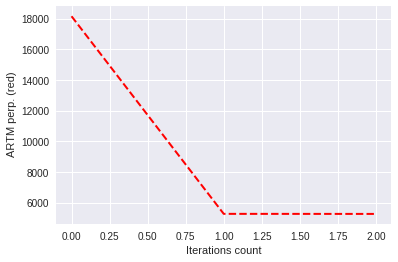

In [58]:
# посмотрим, что стало с моделью
# если график сильно падал на последних итерациях, то можно прогнать обучение ещё несколько раз 
# (не добавляя другие регуляризаторы)
print_measures(model_artm)

Добавим регуляризаторы разреженности тем и документов.

Их рекомендуется добавлять после того, как модель уже как-то сошлась. После добавления их рекомендуется постепенно уменьшать, чтобы усиливать разреживание. Их можно применять не ко всем темам, чтобы в каких-то темах собрались все стоп-слова.

Можно добавлять их вместе или по отдельности.

In [0]:
def next_artm(model_artm, tau, n, batch_vectorizer, num_collection_passes):
  model_artm.regularizers.add(artm.SmoothSparsePhiRegularizer(name='SparsePhi', tau=-tau, 
                                                            topic_names=['topic_{}'.format(i) for i in range(1, n)],
                                                            ))
  model_artm.regularizers.add(artm.SmoothSparseThetaRegularizer(name='SparseTheta', tau=-tau, 
                                                              topic_names=['topic_{}'.format(i) for i in range(1, n)]))
  model_artm.fit_offline(batch_vectorizer=batch_vectorizer,num_collection_passes=1)
  
  phi_tau = model_artm.regularizers['SparsePhi'].tau
  theta_tau = model_artm.regularizers['SparseTheta'].tau

  for i in range(10):
      model_artm.regularizers['SparsePhi'].tau = (phi_tau + (phi_tau*0.5))
      model_artm.regularizers['SparseTheta'].tau = (theta_tau + (theta_tau*0.1))
    
      model_artm.fit_offline(batch_vectorizer=batch_vectorizer,num_collection_passes=num_collection_passes)

  print_measures(model_artm)
  return model_artm

In [0]:
model_artm.regularizers.add(artm.SmoothSparsePhiRegularizer(name='SparsePhi', tau=-0.15, 
                                                            topic_names=['topic_{}'.format(i) for i in range(1, 200)],
                                                            ))
model_artm.regularizers.add(artm.SmoothSparseThetaRegularizer(name='SparseTheta', tau=-0.15, 
                                                              topic_names=['topic_{}'.format(i) for i in range(1, 200)]))

In [0]:
model_artm.fit_offline(batch_vectorizer=batch_vectorizer,num_collection_passes=1)

In [0]:
# будем постепенно увеличивать значения этих регуляризаторов
phi_tau = model_artm.regularizers['SparsePhi'].tau
theta_tau = model_artm.regularizers['SparseTheta'].tau

for i in range(10):
    model_artm.regularizers['SparsePhi'].tau = (phi_tau + (phi_tau*0.5))
    model_artm.regularizers['SparseTheta'].tau = (theta_tau + (theta_tau*0.1))
    
    model_artm.fit_offline(batch_vectorizer=batch_vectorizer,num_collection_passes=2)
    

Sparsity Phi: 0.959 ARTM)
Sparsity Theta: 0.246 (ARTM)
Kernel contrast: 0.398 (ARTM)
Kernel purity: 0.597 (ARTM)
Perplexity: 2105.772 (ARTM)


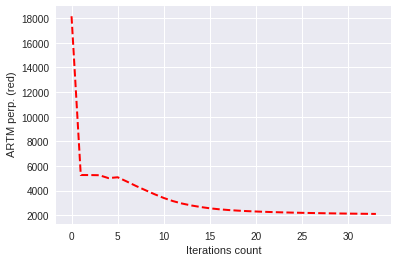

In [64]:
# посмотрим на качество
print_measures(model_artm)

Перплексия должна снижаться. Если график выровнился и больше не меняется - модель сошлась. Обычно перплексия хорошей модели около 200-1000. На таком небольшом количестве данных возможно такого значения достичь не получится.

In [0]:
# посмотрим на темы
import pandas as pd

def topics(model_artm):
  
  d = {}
  
  for topic_name in model_artm.topic_names[:10]:
      try:
          a = []
          for x in model_artm.score_tracker['TopTokensScore_1'].last_tokens[topic_name]:
             a.append(x)
          d[topic_name] = a
    
      except KeyError: # можно перекрутить параметры и некоторые темы окажутся пустыми
          continue
  return pd.DataFrame(d)

50 0.25 0.15
Sparsity Phi: 0.000 ARTM)
Sparsity Theta: 0.000 (ARTM)
Kernel contrast: 0.002 (ARTM)
Kernel purity: 0.000 (ARTM)
Perplexity: 5051.572 (ARTM)


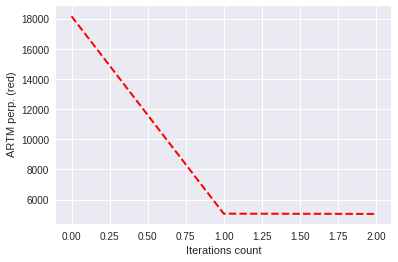

None
100 0.25 0.15
Sparsity Phi: 0.000 ARTM)
Sparsity Theta: 0.000 (ARTM)
Kernel contrast: 0.001 (ARTM)
Kernel purity: 0.000 (ARTM)
Perplexity: 5090.751 (ARTM)


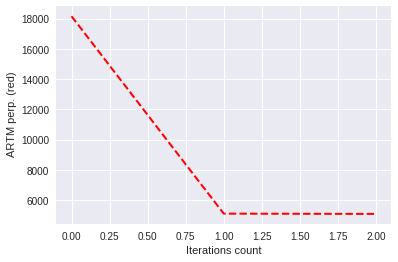

None
200 0.25 0.15
Sparsity Phi: 0.000 ARTM)
Sparsity Theta: 0.000 (ARTM)
Kernel contrast: 0.001 (ARTM)
Kernel purity: 0.000 (ARTM)
Perplexity: 5260.334 (ARTM)


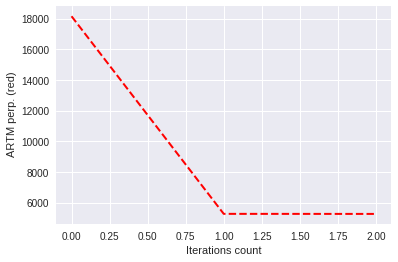

None
300 0.25 0.15
Sparsity Phi: 0.000 ARTM)
Sparsity Theta: 0.000 (ARTM)
Kernel contrast: 0.001 (ARTM)
Kernel purity: 0.000 (ARTM)
Perplexity: 5260.334 (ARTM)


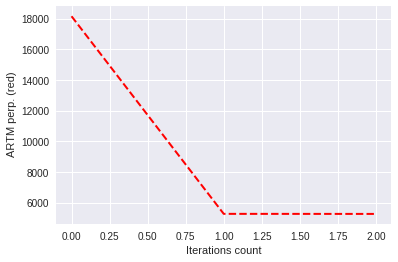

None


In [20]:
models = []
params = [50, 100, 200, 300]
for i in params:
  model = my_artm(i, 0.25, 0.15, batch_vectorizer)
  models.append(model)

Модели сошлись,  идем дальше

Sparsity Phi: 0.476 ARTM)
Sparsity Theta: 0.066 (ARTM)
Kernel contrast: 0.262 (ARTM)
Kernel purity: 0.477 (ARTM)
Perplexity: 2125.623 (ARTM)


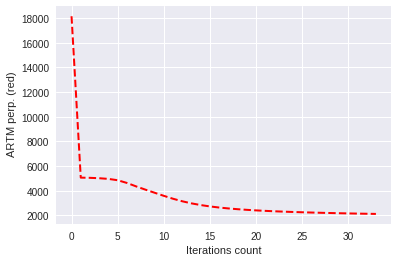

Sparsity Phi: 0.626 ARTM)
Sparsity Theta: 0.126 (ARTM)
Kernel contrast: 0.294 (ARTM)
Kernel purity: 0.512 (ARTM)
Perplexity: 2104.023 (ARTM)


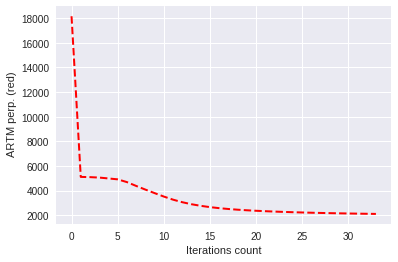

Sparsity Phi: 0.947 ARTM)
Sparsity Theta: 0.220 (ARTM)
Kernel contrast: 0.374 (ARTM)
Kernel purity: 0.565 (ARTM)
Perplexity: 2106.607 (ARTM)


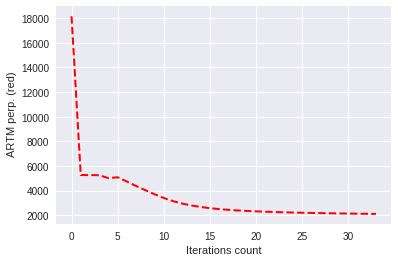

Sparsity Phi: 0.947 ARTM)
Sparsity Theta: 0.220 (ARTM)
Kernel contrast: 0.374 (ARTM)
Kernel purity: 0.565 (ARTM)
Perplexity: 2106.607 (ARTM)


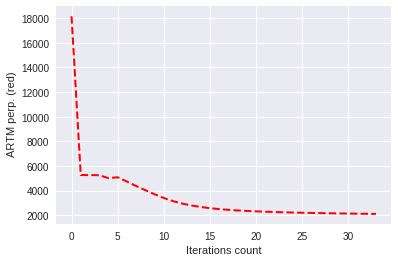

In [21]:
for index, model in enumerate(models):
  models[index] = next_artm(model, 0.15, params[index], batch_vectorizer, 3)

In [22]:
for index, model in enumerate(models):
    print(topics(model))
    print()

          topic_0       topic_1      topic_2          topic_3       topic_4  \
0         новость       ноутбук      человек            закон  производство   
1       очередной        доллар        жизнь            право    транзистор   
2         впрочем        стоить  чувствовать  государственный       образец   
3            nmap       планшет      чувство       российский           чип   
4           котик       сегодня        мысль             дело   современный   
5        закрытый    устройство         дело    международный      кристалл   
6     поздравлять     выпустить     ощущение              суд   разработать   
7           добро       линейка          еда          принять      материал   
8  судить_по_весь  жёсткий_диск     мышление              сша     способный   
9       исполнять            гб         жена           власть      германия   

       topic_5      topic_6       topic_7      topic_8     topic_9  
0       датчик          дом      заказчик     участник      м

По моему мнению лучшие темы получились при параметрах: 50, 0.25, 0.15. Например, topic_3, 5, 8, 9

50 0.15 0.25
Sparsity Phi: 0.000 ARTM)
Sparsity Theta: 0.000 (ARTM)
Kernel contrast: 0.002 (ARTM)
Kernel purity: 0.000 (ARTM)
Perplexity: 5055.970 (ARTM)


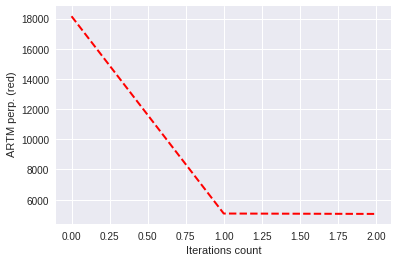

None
50 0.25 0.15
Sparsity Phi: 0.000 ARTM)
Sparsity Theta: 0.000 (ARTM)
Kernel contrast: 0.002 (ARTM)
Kernel purity: 0.000 (ARTM)
Perplexity: 5051.572 (ARTM)


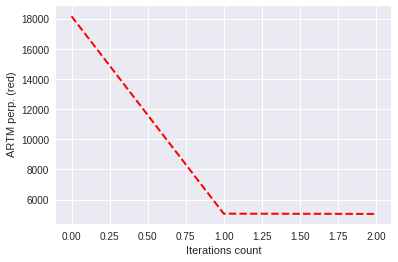

None
50 0.5 0.15
Sparsity Phi: 0.000 ARTM)
Sparsity Theta: 0.000 (ARTM)
Kernel contrast: 0.002 (ARTM)
Kernel purity: 0.000 (ARTM)
Perplexity: 5051.572 (ARTM)


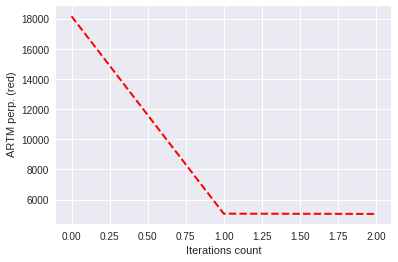

None
50 0.15 0.5
Sparsity Phi: 0.000 ARTM)
Sparsity Theta: 0.000 (ARTM)
Kernel contrast: 0.002 (ARTM)
Kernel purity: 0.000 (ARTM)
Perplexity: 5059.803 (ARTM)


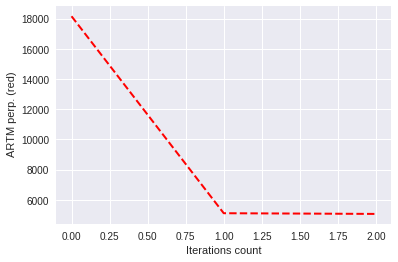

None
50 0.25 0.5
Sparsity Phi: 0.000 ARTM)
Sparsity Theta: 0.000 (ARTM)
Kernel contrast: 0.002 (ARTM)
Kernel purity: 0.000 (ARTM)
Perplexity: 5059.803 (ARTM)


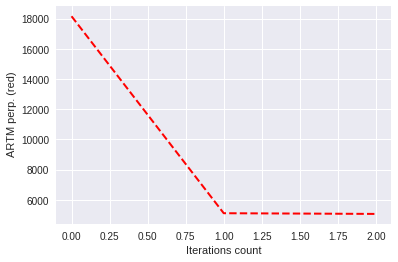

None
50 0.5 0.25
Sparsity Phi: 0.000 ARTM)
Sparsity Theta: 0.000 (ARTM)
Kernel contrast: 0.002 (ARTM)
Kernel purity: 0.000 (ARTM)
Perplexity: 5055.970 (ARTM)


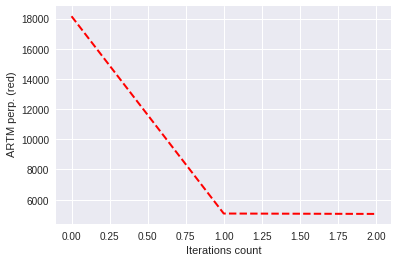

None


In [29]:
models = []
params = [(0.15, 0.25), (0.25, 0.15), (0.5, 0.15), (0.15, 0.5), (0.25, 0.5), (0.5, 0.25)]

for i in params:
  model = my_artm(50, i[0], i[1], batch_vectorizer)
  models.append(model)

Sparsity Phi: 0.470 ARTM)
Sparsity Theta: 0.098 (ARTM)
Kernel contrast: 0.273 (ARTM)
Kernel purity: 0.480 (ARTM)
Perplexity: 2136.086 (ARTM)


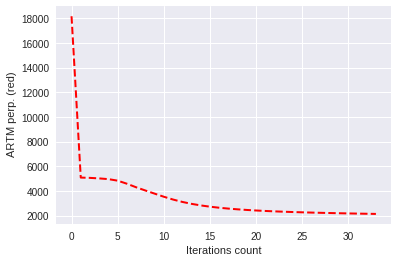

Sparsity Phi: 0.476 ARTM)
Sparsity Theta: 0.066 (ARTM)
Kernel contrast: 0.262 (ARTM)
Kernel purity: 0.477 (ARTM)
Perplexity: 2125.623 (ARTM)


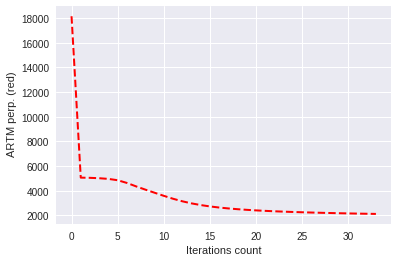

Sparsity Phi: 0.476 ARTM)
Sparsity Theta: 0.066 (ARTM)
Kernel contrast: 0.262 (ARTM)
Kernel purity: 0.477 (ARTM)
Perplexity: 2125.623 (ARTM)


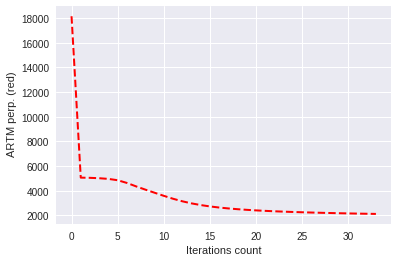

Sparsity Phi: 0.461 ARTM)
Sparsity Theta: 0.149 (ARTM)
Kernel contrast: 0.297 (ARTM)
Kernel purity: 0.500 (ARTM)
Perplexity: 2158.102 (ARTM)


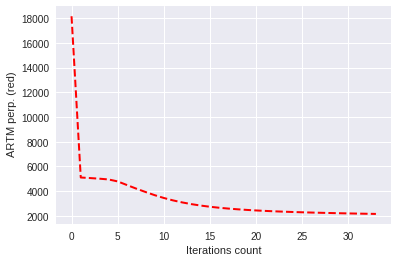

Sparsity Phi: 0.461 ARTM)
Sparsity Theta: 0.149 (ARTM)
Kernel contrast: 0.297 (ARTM)
Kernel purity: 0.500 (ARTM)
Perplexity: 2158.102 (ARTM)


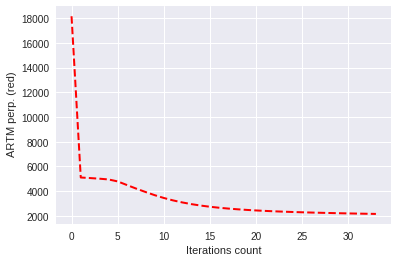

Sparsity Phi: 0.470 ARTM)
Sparsity Theta: 0.098 (ARTM)
Kernel contrast: 0.273 (ARTM)
Kernel purity: 0.480 (ARTM)
Perplexity: 2136.086 (ARTM)


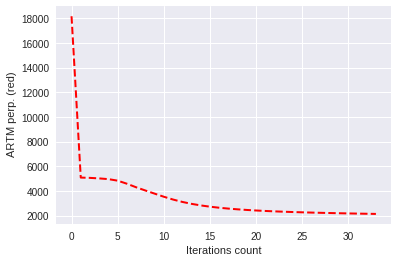

In [30]:
for index, model in enumerate(models):
  models[index] = next_artm(model, params[index][1], 50, batch_vectorizer, 3)

In [31]:
for index, model in enumerate(models):
    print(topics(model))
    print()

         topic_0      topic_1  topic_2          topic_3       topic_4  \
0          глава      ноутбук    книга           страна       образец   
1        новость       доллар    жизнь              сша    транзистор   
2          котик       россия      дом            закон  производство   
3    поздравлять    выпустить      мой  государственный      материал   
4      исполнять      сегодня     дело     американский      кристалл   
5     порадовать       стоить  чувство           россия          атом   
6       репортёр    появиться  человек    международный   современный   
7      телеканал        рубль    мысль      государство   электронный   
8          robot  официальный     жена            право     способный   
9  очень_опасный    китайский      еда          местный     поколение   

       topic_5          topic_6       topic_7       topic_8     topic_9  
0       датчик             звук      заказчик      участник      машина  
1  аккумулятор          наушник      менеджер   

Кажется, что второй и последний результуты самые лучшие (если судить по словам). Хорошие темы 5, 6, 9



**6) для самой хорошей модели в отдельной ячейке напечатайте 3 хороших (на ваш вкус) темы**

**7) в другой ячейке нарисуйте график обучения этой модели**

50 0.25 0.15
Sparsity Phi: 0.000 ARTM)
Sparsity Theta: 0.000 (ARTM)
Kernel contrast: 0.002 (ARTM)
Kernel purity: 0.000 (ARTM)
Perplexity: 5051.572 (ARTM)


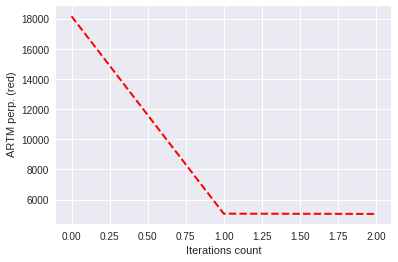

None
Sparsity Phi: 0.701 ARTM)
Sparsity Theta: 0.078 (ARTM)
Kernel contrast: 0.289 (ARTM)
Kernel purity: 0.651 (ARTM)
Perplexity: 1979.008 (ARTM)


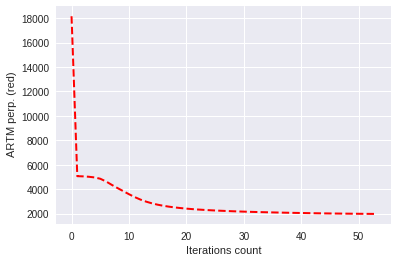

In [41]:
model = my_artm(50, 0.25, 0.15, batch_vectorizer)
model = next_artm(model, 0.15, 50, batch_vectorizer, 5)

In [42]:
topics(model)[['topic_3', 'topic_5', 'topic_9']]

,topic_3,topic_5,topic_9
0,закон,датчик,машина
1,российский,устройство,автомобиль
2,право,аккумулятор,дорога
3,государственный,регистратор,водитель
4,дело,корпус,велосипед
5,суд,батарея,улица
6,отечественный,аппарат,колесо
7,представитель,китайский,самолёт
8,принять,дрон,ехать
9,зарубежный,мотор,транспорт


**8) в третьей ячейки опишите какие параметры (количество тем, регуляризаторы, их tau) вы использовали и как обучали (например, после скольки проходов добавили регуляризатор разрежнивания тем (Phi), добавляли ли разреженность документам (Theta) и когда, как повышали значения, сколько итерации модель продожала улучшаться (снижалась перплексия, росли другие метрики);**

Была изменена функция удаления тегов, расширен список стоп-слов английским списком, добавлены нграммы.

Все модели обучались одинаковым способом. 

Параметры, которые перебирались: 

1) количество тем - 50, 100, 200, 300

2)  tau (и для регуляризатор сглаживания и для регуляризатора декорреляции) - (0.15, 0.25), (0.25, 0.15), (0.5, 0.15), (0.15, 0.5), (0.25, 0.5), (0.5, 0.25)

3) Кол-во  выдаваемых топиков - 10

Затем 2 раза проходимся по документу и 3 по кол-ции. Если модель сходилась, переходили к добавлению регуляризаторов разреженности тем и документов. Параметры использовались такие же как и на предыдущем этапе. В итоге эксперемент показал, что маленькое число тем дает лучший результат, так как при переборе дефолтные параметры tau (0.25, 0.15) показали себя лучше всего, они и использовались в финальном тесте. Кол-во проходов было увеличено до 5 для достижения лучшей сводимости модели. Получившиеся топики хорошо отделимы друг от друга, действительно отражают определенные темы.